In [1]:
from estimark.agents import IndShkLifeCycleConsumerType
import estimark.calibration.estimation_parameters as parameters
import numpy as np
from HARK.utilities import plot_funcs
import matplotlib.pyplot as plt
import pandas as pd
from HARK.ConsumptionSaving.ConsIndShockModel import init_lifecycle

***NOTE: using a 'quick fix' for an attribute error. See 'Error Notes' in EstimationParameter.py for further discussion.***


In [2]:
DiscFacAdj, CRRA = np.genfromtxt(
    "tables/IndShock_estimate_results.csv", skip_header=1, delimiter=","
)

In [3]:
indshk_agent = IndShkLifeCycleConsumerType(
    **{**init_lifecycle, **parameters.init_consumer_objects}
)
indshk_agent.CRRA = CRRA
indshk_agent.DiscFac = [b * DiscFacAdj for b in parameters.DiscFac_timevary]
CRRA, DiscFacAdj

(1.3759978446748666, 0.9552205116274122)

In [4]:
indshk_agent.solve()

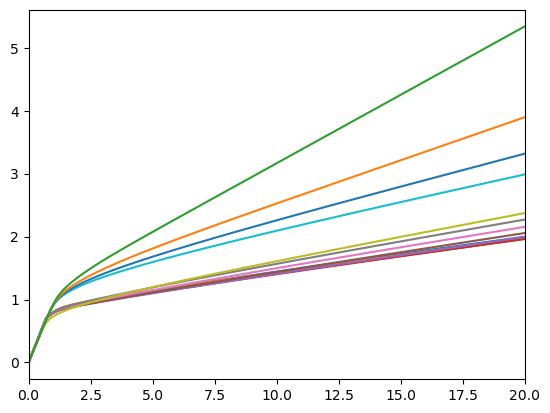

<Figure size 640x480 with 0 Axes>

In [5]:
plot_funcs([sol.cFunc for sol in indshk_agent.solution[:-1:5]], 0, 20)
plt.savefig("../content/figures/IndShock_cFunc.png")

In [6]:
# Set up the variables we want to keep track of.
indshk_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

indshk_agent.T_sim = 200
# Run the simulations
indshk_agent.initialize_sim()
history = indshk_agent.simulate()

In [7]:
raw_data = {
    "Age": indshk_agent.history["t_age"].flatten() + 25 - 1,
    "pIncome": indshk_agent.history["pLvl"].flatten(),
    "nrmM": indshk_agent.history["mNrm"].flatten(),
    "nrmC": indshk_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

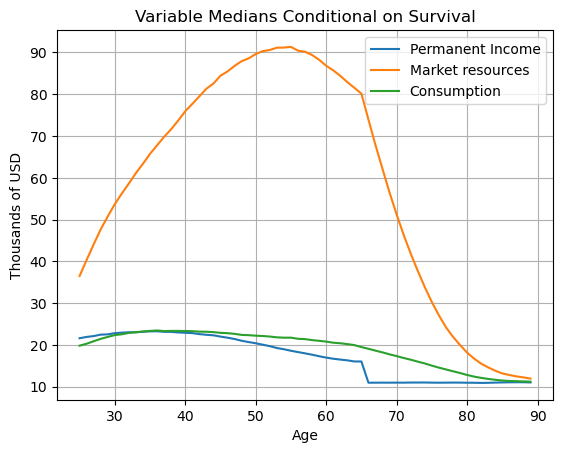

In [8]:
# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()

In [9]:
indshk_agent = IndShkLifeCycleConsumerType(**parameters.init_consumer_objects)
indshk_agent.CRRA = CRRA
indshk_agent.DiscFac = [b * DiscFacAdj for b in parameters.DiscFac_timevary]

lifecycle_agent = IndShkLifeCycleConsumerType(
    **{**init_lifecycle, "PermGroFacAgg": 1.0}
)


lifecycle_agent.DiscFac = [
    init_lifecycle["DiscFac"] for b in parameters.DiscFac_timevary
]

In [10]:
param_list = set(lifecycle_agent.__dict__.keys()).union(
    set(indshk_agent.__dict__.keys())
)

for param in param_list:
    current_value = getattr(indshk_agent, param, None)
    original_value = getattr(lifecycle_agent, param, None)

    if current_value is None:
        print(f"{param} not in indshk_agent\n")
    elif original_value is None:
        print(f"{param} not in lifecycle_agent\n")
    else:
        print(f"{param}")
        print(f"current:  {current_value}")
        print(f"original: {original_value}")
        print("\n")

PerfMITShk
current:  False
original: False


bilt
current:  {}
original: {}


quiet
current:  False
original: False


state_now
current:  {'pLvl': None, 'PlvlAgg': None, 'bNrm': None, 'mNrm': None, 'aNrm': None, 'aLvl': None}
original: {'pLvl': None, 'PlvlAgg': None, 'bNrm': None, 'mNrm': None, 'aNrm': None, 'aLvl': None}


T_age
current:  65
original: 65


controls
current:  {}
original: {}


shocks
current:  {}
original: {}


track_vars
current:  []
original: []


parameters
current:  {'cycles': 1, 'CRRA': 5.0, 'Rfree': 1.03, 'DiscFac': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]), 'LivPrb': [0.998341, 0.998262, 0.99826, 0.998172, 0.99803, 0.99796, 0.997886, 0.997792, 0.997587, 0.99747, 0.997398, 0.997621, 0.997822, 0.997755, 0.997607, 0.997421

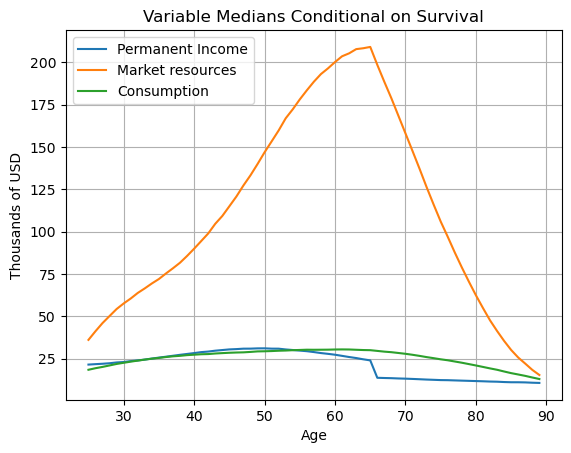

In [11]:
lifecycle_agent.solve()
# Set up the variables we want to keep track of.
lifecycle_agent.track_vars = ["aNrm", "cNrm", "pLvl", "t_age", "mNrm"]

lifecycle_agent.T_sim = 200
# Run the simulations
lifecycle_agent.initialize_sim()
history = lifecycle_agent.simulate()

raw_data = {
    "Age": lifecycle_agent.history["t_age"].flatten() + 25 - 1,
    "pIncome": lifecycle_agent.history["pLvl"].flatten(),
    "nrmM": lifecycle_agent.history["mNrm"].flatten(),
    "nrmC": lifecycle_agent.history["cNrm"].flatten(),
}

Data = pd.DataFrame(raw_data)
Data["Cons"] = Data.nrmC * Data.pIncome
Data["M"] = Data.nrmM * Data.pIncome

# Find the mean of each variable at every age
AgeMeans = Data.groupby(["Age"]).median().reset_index()

plt.figure()
plt.plot(AgeMeans.Age, AgeMeans.pIncome, label="Permanent Income")
plt.plot(AgeMeans.Age, AgeMeans.M, label="Market resources")
plt.plot(AgeMeans.Age, AgeMeans.Cons, label="Consumption")
plt.legend()
plt.xlabel("Age")
plt.ylabel("Thousands of USD")
plt.title("Variable Medians Conditional on Survival")
plt.grid()